# Lecture 2: Image Filtering

CMU 16-385 Computer Vision, Fall 2020 (http://16385.courses.cs.cmu.edu/)

## Part 1: What is an image?

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from skimage import io as io_url
from skimage.util import random_noise


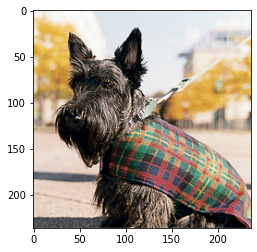

In [4]:
frame = io_url.imread('images/scotty.jpg')
frame = np.float32(frame) / 255

plt.imshow(frame)

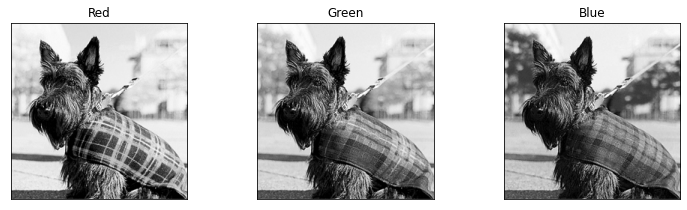

In [5]:
fig = plt.figure(figsize=(12, 12));
fig.subplots_adjust(hspace=0.4, wspace=0.4);

ax = fig.add_subplot(1, 3, 1);
ax.set_title('Red');
ax.imshow(frame[:,:,0], cmap="gray");
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(1, 3, 2);
ax.set_title('Green');
ax.imshow(frame[:,:,1], cmap="gray");
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(1, 3, 3);
ax.set_title('Blue');
ax.imshow(frame[:,:,2], cmap="gray");
ax.set_xticks([]); ax.set_yticks([]);

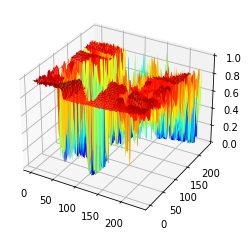

In [6]:
x = range(frame.shape[0]);
y = range(frame.shape[1]);

X, Y = np.meshgrid(y, x);

fig = plt.figure();
ax = plt.axes(projection='3d');
ax.plot_surface(X, Y, frame[:,:,0], cmap='jet');

## Part 2: Point processing

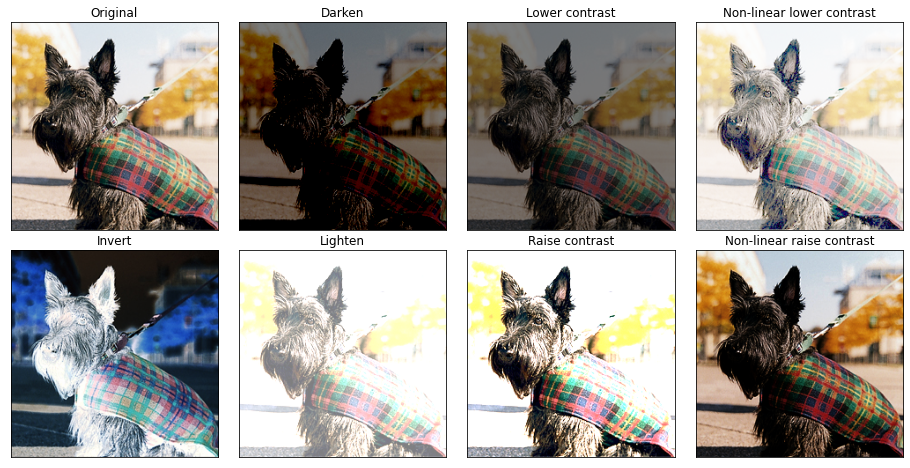

In [7]:
fig = plt.figure(figsize=(16, 8));
fig.subplots_adjust(hspace=0.1, wspace=0.1);

ax = fig.add_subplot(2, 4, 1);
ax.set_title('Original');
ax.imshow(frame);
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 2);
ax.set_title('Darken');
ax.imshow(np.clip(frame - 0.5, 0, 1));
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 3);
ax.set_title('Lower contrast');
ax.imshow(frame / 2);
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 4);
ax.set_title('Non-linear lower contrast');
ax.imshow(frame**(1/3));
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 5);
ax.set_title('Invert');
ax.imshow(1 - frame);
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 6);
ax.set_title('Lighten');
ax.imshow(np.clip(frame + 0.5, 0, 1));
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 7);
ax.set_title('Raise contrast');
ax.imshow(np.clip(frame * 2, 0, 1));
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 8);
ax.set_title('Non-linear raise contrast');
ax.imshow(frame**2);
ax.set_xticks([]); ax.set_yticks([]);

## Part 3: Linear shift-invariant image filtering
#### Box filter and Sharpening filter

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


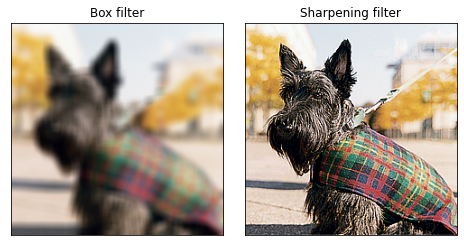

In [9]:
fig = plt.figure(figsize=(8,8));
fig.subplots_adjust(hspace=0.1, wspace=0.1);

# Box filter
N = 10;
g = np.ones((N,N))/(N**2);
image = cv2.filter2D(frame,-1,g);

ax = fig.add_subplot(1,2,1);
ax.set_title('Box filter');
plt.imshow(image,cmap='gray');
ax.set_xticks([]); ax.set_yticks([])

# Sharpening filter
N = 3;
g = -np.ones((N,N))/(N**2);
g[(N-1)//2,(N-1)//2] += 2;
image = cv2.filter2D(frame,-1,g);

ax = fig.add_subplot(1,2,2);
ax.set_title('Sharpening filter');
plt.imshow(image,cmap='gray');
ax.set_xticks([]); ax.set_yticks([]);

#### Gaussian filter

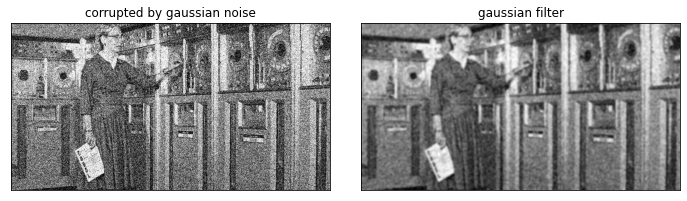

In [19]:
img = io_url.imread('images/Hopper.jpg',0)
fig = plt.figure(figsize=(12, 12));
fig.subplots_adjust(hspace=0.1, wspace=0.1);

# corrupted by gaussian noise
mean, sigma = 0,0.25
noise = np.random.normal(mean, sigma, img.shape)
img_gaussian = img/255 + noise
img_gaussian = np.clip(img_gaussian,0,1)
img_gaussian = np.uint8(img_gaussian*255)

ax = fig.add_subplot(1,2,1);
ax.set_title('corrupted by gaussian noise')
plt.imshow(img_gaussian,cmap='gray');
ax.set_xticks([]); ax.set_yticks([]);

width = 11
img_blur = cv2.GaussianBlur(img_gaussian,(width,width),0);
ax = fig.add_subplot(1,2,2);
ax.set_title('gaussian filter');
plt.imshow(img_blur,cmap='gray');
ax.set_xticks([]); ax.set_yticks([]);

#### Median filter (nonlinear)
Gaussian filtering is good at smoothing additive, zero-mean noise (assuming nearby pixels share the same value) <br>
**Pepper and sault (Impulse) noise** break this assumption

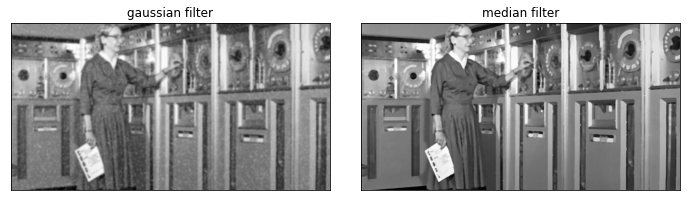

In [30]:
im_arr = np.array(img)
noise_img = random_noise(im_arr, mode='salt')
noise_img = np.uint8(noise_img*255)
gaussian = cv2.GaussianBlur(noise_img,(9,9),0);
median = cv2.medianBlur(noise_img,5)

fig = plt.figure(figsize=(12, 12));
fig.subplots_adjust(hspace=0.1, wspace=0.1);

ax = fig.add_subplot(1,2,1);
ax.set_title('gaussian filter')
plt.imshow(gaussian,cmap='gray');
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(1,2,2);
ax.set_title('median filter')
plt.imshow(median,cmap='gray');
ax.set_xticks([]); ax.set_yticks([]);

## Part 4: Image gradients

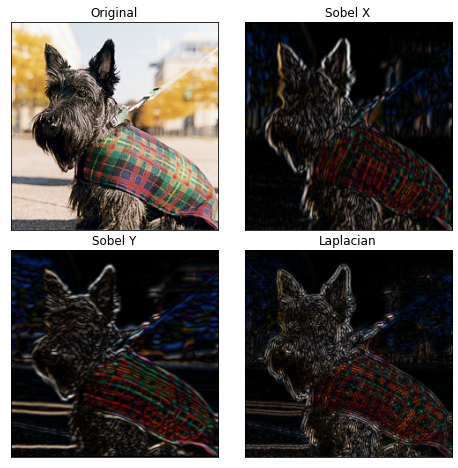

In [42]:
k = 7 # Kernel size

laplacian = cv2.Laplacian(frame,-1,ksize=k)
sobel_x = cv2.Sobel(frame,-1,1,0,ksize=k)
sobel_y = cv2.Sobel(frame,-1,0,1,ksize=k)

fig = plt.figure(figsize=(8, 8));
fig.subplots_adjust(hspace=0.1, wspace=0.1);

ax = fig.add_subplot(2, 2, 1);
ax.set_title('Original');
ax.imshow((frame), cmap='gray');
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 2, 2);
ax.set_title('Sobel X');
ax.imshow(np.abs(sobel_x)/np.abs(sobel_x).max(), cmap='gray');
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 2, 3);
ax.set_title('Sobel Y');
ax.imshow(np.abs(sobel_y)/np.abs(sobel_y).max(), cmap='gray');
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 2, 4);
ax.set_title('Laplacian');
ax.imshow(np.abs(laplacian)/np.abs(laplacian).max(), cmap='gray');
ax.set_xticks([]); ax.set_yticks([]);